<a href="https://colab.research.google.com/github/expectnothin/asrkr-ml-py/blob/main/asrkr_netflix_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  netflix-shows.zip
replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: netflix_titles.csv      


/tmp/ipython-input-2-1654970912.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].apply(lambda x: x.split(',')[0])
/tmp/ipython-input-2-1654970912.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['listed_in'].apply(lambda x: [g.strip() for g in x.split(',')])
/tmp/ipython-input-2-1654970912.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=Fals

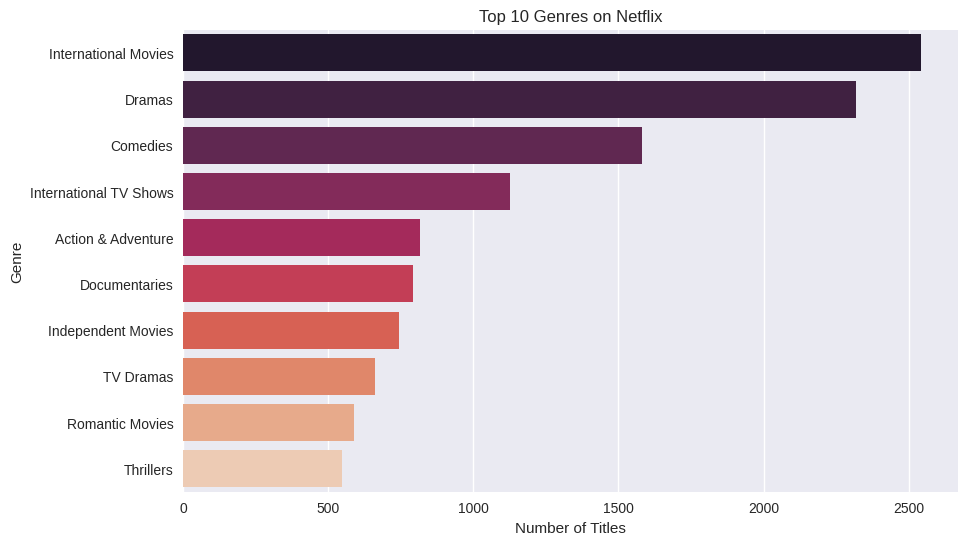


Top genres in United States:
            country                    genres  count
1060  United States                    Dramas    674
1055  United States                  Comedies    610
1058  United States             Documentaries    453
1052  United States  Children & Family Movies    337
1063  United States        Independent Movies    331

Top genres in India:
    country                genres  count
402   India  International Movies    845
398   India                Dramas    645
393   India              Comedies    315
401   India    Independent Movies    162
389   India    Action & Adventure    130

Top genres in United Kingdom:
             country                  genres  count
1014  United Kingdom        British TV Shows    216
1023  United Kingdom                  Dramas    134
1027  United Kingdom    International Movies    125
1028  United Kingdom  International TV Shows    124
1021  United Kingdom           Documentaries    103

Top genres in Canada:
    country       

/tmp/ipython-input-2-1654970912.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_orig_genres.values, y=top_orig_genres.index, palette='coolwarm')


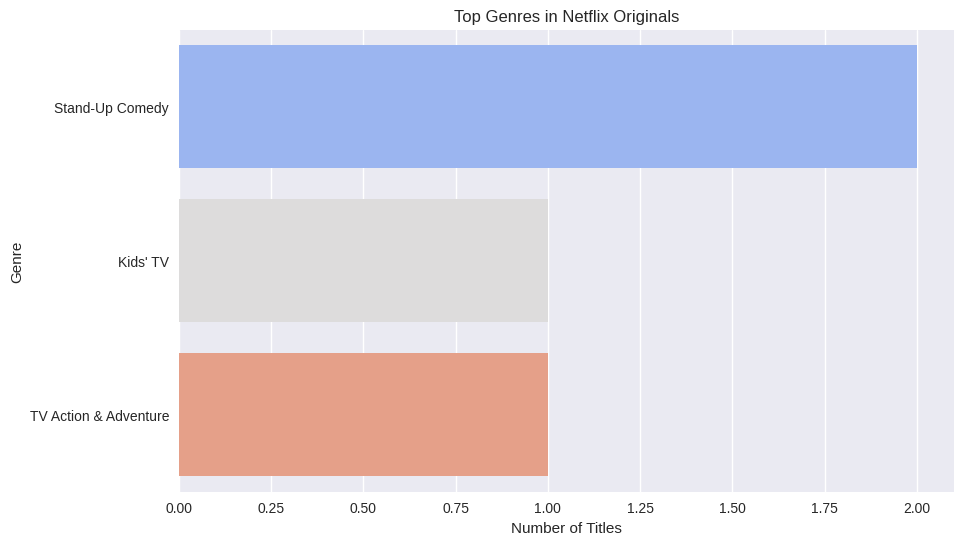

In [2]:
# 📦 Step 1: Kaggle Auth and Dataset Download
from google.colab import files
files.upload()  # Upload your kaggle.json here

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d shivamb/netflix-shows
!unzip netflix-shows.zip

# 📊 Step 2: Load Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Use a valid style, for example 'ggplot' or 'seaborn-v0_8'
plt.style.use("seaborn-v0_8")

# Load data
df = pd.read_csv("netflix_titles.csv")
df.head()

# 🧼 Step 3: Clean and Preprocess
df = df.dropna(subset=['country', 'listed_in'])
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['genres'] = df['listed_in'].apply(lambda x: [g.strip() for g in x.split(',')])

# 🧨 Step 4: Explode Genres for Analysis
df_genre = df.explode('genres')

# 📈 Step 5: Most Common Genres Overall
top_genres = df_genre['genres'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

# 🌍 Step 6: Top Genres by Country
genre_country = df_genre.groupby(['country', 'genres']).size().reset_index(name='count')
top_countries = df['country'].value_counts().head(5).index

for country in top_countries:
    temp = genre_country[genre_country['country'] == country].sort_values('count', ascending=False).head(5)
    print(f"\nTop genres in {country}:")
    print(temp)

# 🎯 Step 7: Netflix Originals (Optional)
df['is_original'] = df['description'].str.contains('Netflix Original', case=False, na=False)
df_originals = df[df['is_original']]
df_orig_genres = df_originals.explode('genres')
top_orig_genres = df_orig_genres['genres'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_orig_genres.values, y=top_orig_genres.index, palette='coolwarm')
plt.title("Top Genres in Netflix Originals")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()